In [ ]:
# pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install alpha_vantage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
from dateutil.relativedelta import relativedelta
from pandas import Timestamp
import numpy as np
import requests
import time as t
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files

In [ ]:
from textwrap import indent
from alpha_vantage.timeseries import TimeSeries
API_KEY = '7LZQJ4YRM3HM9DHH'
output_size = 'compact'
ts = TimeSeries(API_KEY, output_format='pandas')

def get_data():
  symbol = input('Ticker: ')
  typ = input('Data type- "daily", "weekly", "monthly", "interval" : ')


  if typ == 'daily':
    state = ts.get_daily_adjusted(symbol, outputsize=output_size)[0]
  elif typ == 'weekly':
    state = ts.get_weekly_adjusted(symbol)[0]
  elif typ == 'monthly':
    state = ts.get_monthly_adjusted(symbol)[0]
  elif typ == 'interval':
    interval = input('Interval-1min, 5min, 15min, 30min, 60min : ')
    state = ts.get_intraday(symbol, interval= interval, outputsize=output_size)[0]
  else:
    print('Wrong entry')
  return state


**Data Retrieval For:**


1.   Plug Power/ PLUG (plug_raw)
2.   Bloom Energy/ BE (bloom_raw)
Oxy



In [ ]:
# plug_raw = ts.get_monthly_adjusted("PLUG")[0]
# bloom_raw = ts.get_monthly_adjusted("BE")[0]
# plug_raw

In [ ]:
# def clean(data, duration):
#   start = pd.Timestamp(year=2019, month=3, day=1)
#   end = pd.Timestamp(year=2022, month=10, day=31)

#   data = data.drop('2. high', axis=1)
#   data = data.drop('3. low', axis=1)
#   data = data.drop('5. adjusted close', axis=1)
#   data = data.drop('6. volume', axis=1)
#   data = data.drop('7. dividend amount', axis=1)
#   data.columns = ['open', 'close']
#   data = data.reset_index()
#   data = data[data['date']>=start]
#   data = data[data['date']<=end]

#   data['pct_change'] = data.apply(lambda row: (row.close-row.open)/row.open, axis=1)

#   data = data.drop('open', axis=1)
#   data = data.drop('close', axis=1)
#   data = data.set_index('date')
#   data = data[::-1]

#   past_4 = (data+1).rolling(duration).apply(np.prod)-1   # 3 month returns are calculated for each month which also includes that month
#   # print(data)
#   # print(past_4)
#   return past_4




**REFINED DATA For:**

1.   Plug Power/ PLUG (plug)
2.   Bloom Energy/ BE (bloom)



In [ ]:
# plug = clean(plug_raw, 3)
# plug.columns = ["Plug Power"]
# bloom = clean(bloom_raw, 3)
# bloom.columns = ["Bloom Energy"]
# df = plug.join(bloom)

In [ ]:
# def decision(stock):
#   if stock["pct_change"][-1] > 0.1:
#     return "Buy"
#   elif stock["pct_change"][-1] > 0.02:
#     return "Hold" 
#   else:
#     return "Sell if holding"

**Mid Month Check for 10% Downside**

In [ ]:
# plug_daily_raw = ts.get_daily_adjusted("PLUG",outputsize=output_size)[0]
# type(plug_daily_raw)

In [ ]:
# def clean_daily(data):
#   start = pd.Timestamp(year=2022, month=10, day=1)
#   end = pd.Timestamp(year=2022, month=12, day=3)
#   data = data.drop('1. open', axis=1)
#   data = data.drop('2. high', axis=1)
#   data = data.drop('3. low', axis=1)
#   data = data.drop('4. close', axis=1)
#   data = data.drop('6. volume', axis=1)
#   data = data.drop('8. split coefficient', axis=1)
#   data = data.drop('7. dividend amount', axis=1)
#   data.columns = ['close']
#   data = data.reset_index()
#   data = data[data['date']>=start]
#   data = data[data['date']<=end]
#   # data = data.drop('open', axis=1)
#   # data = data.drop('close', axis=1)
#   data = data[::-1]
#   return data


In [ ]:
# plug_daily = clean_daily(plug_daily_raw)

In [ ]:
# def downside_check(data, month, downside):
#   mid_day = data[(data['date'].dt.day > 13) & (data['date'].dt.day < 17) & (data['date'].dt.month == month)].iloc[:1, :]
#   start_day = data[(data['date'].dt.day > 0) & (data['date'].dt.day < 4) & (data['date'].dt.month == month)].iloc[:1, :]
#   # print(start_day)
#   # print(mid_day)
#   # print(f"Price on Start-month: %.2f" %(float(start_day['close'].iloc[0])))
#   # print(f"Price on Mid-month: %.2f" %(float(mid_day['close'].iloc[0])))
#   pct_change = (float(mid_day['close'].iloc[0]) - float(start_day['close'].iloc[0]))/float(start_day['close'].iloc[0])
#   # print(pct_change)
#   if pct_change < -downside/100:
#     print("Sell: Volitility exceeded!\nPercentage Change: %.3f%%" %(float(pct_change)*100))
#   else:
#     print(f"You're doing great!\nPercentage Change: %.3f%%" %(float(pct_change)*100))
# downside_check(plug_daily, 10, 10)

In [ ]:
def clean_yahoo(data, duration):

  data = data.drop('High', axis=1)
  data = data.drop('Low', axis=1)
  data = data.drop('Adj Close', axis=1)
  data = data.drop('Volume', axis=1)
  data.columns = ['open', 'close']
  data = data.reset_index()

  data['pct_change'] = data.apply(lambda row: (row.close-row.open)/row.open, axis=1)

  data = data.drop('open', axis=1)
  data = data.drop('close', axis=1)
  data = data.set_index('Date')

  past_4 = (data+1).rolling(duration).apply(np.prod)-1 

  return past_4



In [ ]:
period1 = int(t.mktime(dt.datetime(2017, 1, 1, 23, 59).timetuple()))
period2 = int(t.mktime(dt.datetime(2022, 12, 31, 23, 59).timetuple()))
interval = '1mo'

bonds = ['TTT', 'TLT', 'SHY', 'EEM'] 
# bonds += [ 'BIL', 'IEF', 'HYGH', 'TIP', 'HYG', 'LQD', 'PFIX', 'VCSH', 'VTI', 'SDS', 'GLD', 'VHT', 'VCR', 'VYM', 'VBK', 'VBR', 'VTV', 'VIS' ] 
bonds += ['QQQ', 'SQQQ']

# etfs = ['XLE', 'XLB', 'XLI', 'XLY', 'XLP', 'XLV', 'XLF', 'XLK', 'XTL', 'XLU', 'XLRE'] 

stocks = ['TTT', 'SHY', 'EEM', 'QQQ', 'SQQQ', 'SPY', 'TLT']

print(len(stocks))


6


In [ ]:
ticker = 'SPY'
query = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
data = pd.read_csv(query)
data = data.set_index('Date')

data=clean_yahoo(data,1)
data.columns = ['SPY']

rolling_1 = pd.DataFrame(data=data)
for i in stocks:
  query2 = f"https://query1.finance.yahoo.com/v7/finance/download/{i}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
  
  stock = pd.read_csv(query2)
  stock = stock.set_index('Date')
  stock = clean_yahoo(stock, 1)
  stock.columns = [i]
#   # print(stock)
  rolling_1 = rolling_1.join(stock)

rolling_1 = rolling_1.replace(np.nan, 0)




In [ ]:
(rolling_1)


,SPY,TTT,SHY,EEM,QQQ,SQQQ,TLT
Date,,,,,,,
2017-01-01,0.011065,-0.045441,0.002015,0.055100,0.044437,-0.123435,0.014272
2017-02-01,0.039292,-0.069050,0.001303,0.013337,0.036429,-0.103370,0.022166
2017-03-01,-0.011116,-0.034288,0.001778,0.028460,0.011693,-0.042388,0.010633
2017-04-01,0.009669,-0.047526,0.001657,0.013921,0.026417,-0.076299,0.015774
2017-05-01,0.011564,-0.064724,0.001183,0.023857,0.035547,-0.103163,0.022270
...,...,...,...,...,...,...,...
2022-08-01,-0.034144,0.165147,-0.008076,-0.003034,-0.045847,0.120188,-0.053869
2022-09-01,-0.090891,0.225338,-0.011322,-0.106786,-0.099285,0.316445,-0.067534
2022-10-01,0.069597,0.258230,-0.003322,-0.026481,0.033003,-0.135000,-0.074531


In [ ]:
rolling_1.shape

(72, 7)

In [ ]:
rolling_1['Monthly Chng (%)'] = (rolling_1.sum(axis=1))/len(rolling_1.columns)

In [ ]:
first_column = rolling_1.pop('Monthly Chng (%)')
rolling_1.insert(0, 'Monthly Chng (%)', first_column*100)
rolling_1

,Monthly Chng (%),SPY,TTT,SHY,EEM,QQQ,SQQQ,TLT
Date,,,,,,,,
2017-01-01,-0.599809,0.011065,-0.045441,0.002015,0.055100,0.044437,-0.123435,0.014272
2017-02-01,-0.855623,0.039292,-0.069050,0.001303,0.013337,0.036429,-0.103370,0.022166
2017-03-01,-0.503270,-0.011116,-0.034288,0.001778,0.028460,0.011693,-0.042388,0.010633
2017-04-01,-0.805520,0.009669,-0.047526,0.001657,0.013921,0.026417,-0.076299,0.015774
2017-05-01,-1.049523,0.011564,-0.064724,0.001183,0.023857,0.035547,-0.103163,0.022270
...,...,...,...,...,...,...,...,...
2022-08-01,2.005195,-0.034144,0.165147,-0.008076,-0.003034,-0.045847,0.120188,-0.053869
2022-09-01,2.370920,-0.090891,0.225338,-0.011322,-0.106786,-0.099285,0.316445,-0.067534
2022-10-01,1.735651,0.069597,0.258230,-0.003322,-0.026481,0.033003,-0.135000,-0.074531


In [ ]:
# rolling_1.to_csv('monthly_pct_chng.csv') 
# files.download('monthly_pct_chng.csv')

In [ ]:
rolling_1.shape

(72, 8)

In [ ]:
ticker = 'SPY'

query = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
data = pd.read_csv(query)
data = data.set_index('Date')

data=clean_yahoo(data,3)
data.columns = ['SPY']
rolling_3 = pd.DataFrame(data=data)

for i in stocks:
  query2 = f"https://query1.finance.yahoo.com/v7/finance/download/{i}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
  
  stock = pd.read_csv(query2)
  stock = stock.set_index('Date')
  stock = clean_yahoo(stock, 3)
  stock.columns = [i]
  # print(stock)
  rolling_3 = rolling_3.join(stock)

rolling_3 = rolling_3.replace(np.nan, 0)

In [ ]:
# rolling_3.to_csv('3_months_pct_chng.csv') 
# files.download('3_months_pct_chng.csv')

In [ ]:
ticker = 'SPY'

query = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
data = pd.read_csv(query)
data = data.set_index('Date')

data=clean_yahoo(data,6)
data.columns = ['SPY']
rolling_6 = pd.DataFrame(data=data)

for i in stocks:
  query2 = f"https://query1.finance.yahoo.com/v7/finance/download/{i}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
  
  stock = pd.read_csv(query2)
  stock = stock.set_index('Date')
  stock = clean_yahoo(stock, 6)
  stock.columns = [i]
  # print(stock)
  rolling_6 = rolling_6.join(stock)

rolling_6 = rolling_6.replace(np.nan, 0)

In [ ]:
ticker = 'SPY'

query = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
data = pd.read_csv(query)
data = data.set_index('Date')

data=clean_yahoo(data,12)
data.columns = ['SPY']
rolling_12 = pd.DataFrame(data=data)

for i in stocks:
  query2 = f"https://query1.finance.yahoo.com/v7/finance/download/{i}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
  
  stock = pd.read_csv(query2)
  stock = stock.set_index('Date')
  stock = clean_yahoo(stock, 12)
  stock.columns = [i]
  # print(stock)
  rolling_12 = rolling_12.join(stock)

rolling_12 = rolling_12.replace(np.nan, 0)



In [ ]:
rolling_12

,SPY,TTT,SHY,EEM,QQQ,SQQQ,TLT
Date,,,,,,,
2017-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-05-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2022-08-01,-0.145126,0.774088,-0.040920,-0.265778,-0.225482,0.303785,-0.223676
2022-09-01,-0.180412,0.986873,-0.050788,-0.313592,-0.257401,0.443891,-0.251276
2022-10-01,-0.177334,1.678676,-0.050525,-0.338986,-0.287549,0.580062,-0.320403


In [ ]:
rolling_6

,SPY,TTT,SHY,EEM,QQQ,SQQQ,TLT
Date,,,,,,,
2017-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-05-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2022-08-01,-0.092099,0.726573,-0.024830,-0.152034,-0.130938,0.088113,-0.195469
2022-09-01,-0.204955,0.819125,-0.020139,-0.219938,-0.253475,0.752368,-0.202774
2022-10-01,-0.064358,0.796285,-0.020685,-0.175549,-0.106831,0.035986,-0.196965


In [ ]:
look_back = rolling_12 + rolling_6
look_back

,SPY,TTT,SHY,EEM,QQQ,SQQQ,TLT
Date,,,,,,,
2017-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-03-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-05-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2022-08-01,-0.237224,1.500662,-0.065749,-0.417812,-0.356420,0.391898,-0.419146
2022-09-01,-0.385367,1.805998,-0.070927,-0.533530,-0.510876,1.196259,-0.454050
2022-10-01,-0.241692,2.474961,-0.071210,-0.514535,-0.394379,0.616048,-0.517369


In [ ]:
stocks_chosen = pd.DataFrame(index = look_back.index, columns = ['Stocks_Chosen', 'Growth (%)'])

for i in range(len(look_back)-1):
    l = list(look_back[i:i+1].sort_values(by=look_back.index[i:i+1][0],axis=1, ascending=False).columns[:1])
    l = [x for x in l if look_back.iloc[i][x] > 0.01]
    val2 = [look_back.iloc[i][j] for j in l]
    # print(len(val2))

    returns = [rolling_1.iloc[i+1][j] for j in l]
    # print(len(returns))
    # if 'OEF' not in l:
      # print(rolling_3.index[i])
    stocks_chosen['Stocks_Chosen'][i+1] = l
    if len(l) == 0:
      stocks_chosen['Growth (%)'][i+1] = 0
    else:
      stocks_chosen['Growth (%)'][i+1] = 100*sum(returns)/len(returns)
stocks_chosen = stocks_chosen

In [ ]:
stocks_chosen.shape

(72, 2)

In [ ]:
stocks_chosen[-15:]

,Stocks_Chosen,Growth (%)
Date,,
2021-10-01,[QQQ],7.671494
2021-11-01,[QQQ],1.878107
2021-12-01,[QQQ],-0.107962
2022-01-01,[QQQ],-9.021426
2022-02-01,[SPY],-3.117509
2022-03-01,[SPY],3.815742
2022-04-01,[SPY],-9.112969
2022-05-01,[TTT],1.162585
2022-06-01,[TTT],3.792919


In [ ]:
# stocks_chosen.shape
len(stocks_chosen[stocks_chosen['Growth (%)'] < 0])

35

In [ ]:
# stocks_chosen.to_csv('stocks_chosen.csv') 
# files.download('stocks_chosen.csv')

Text(0, 20, 'List of ETFs: TTT, SHY, EEM, QQQ, SQQQ, TLT, SPY')

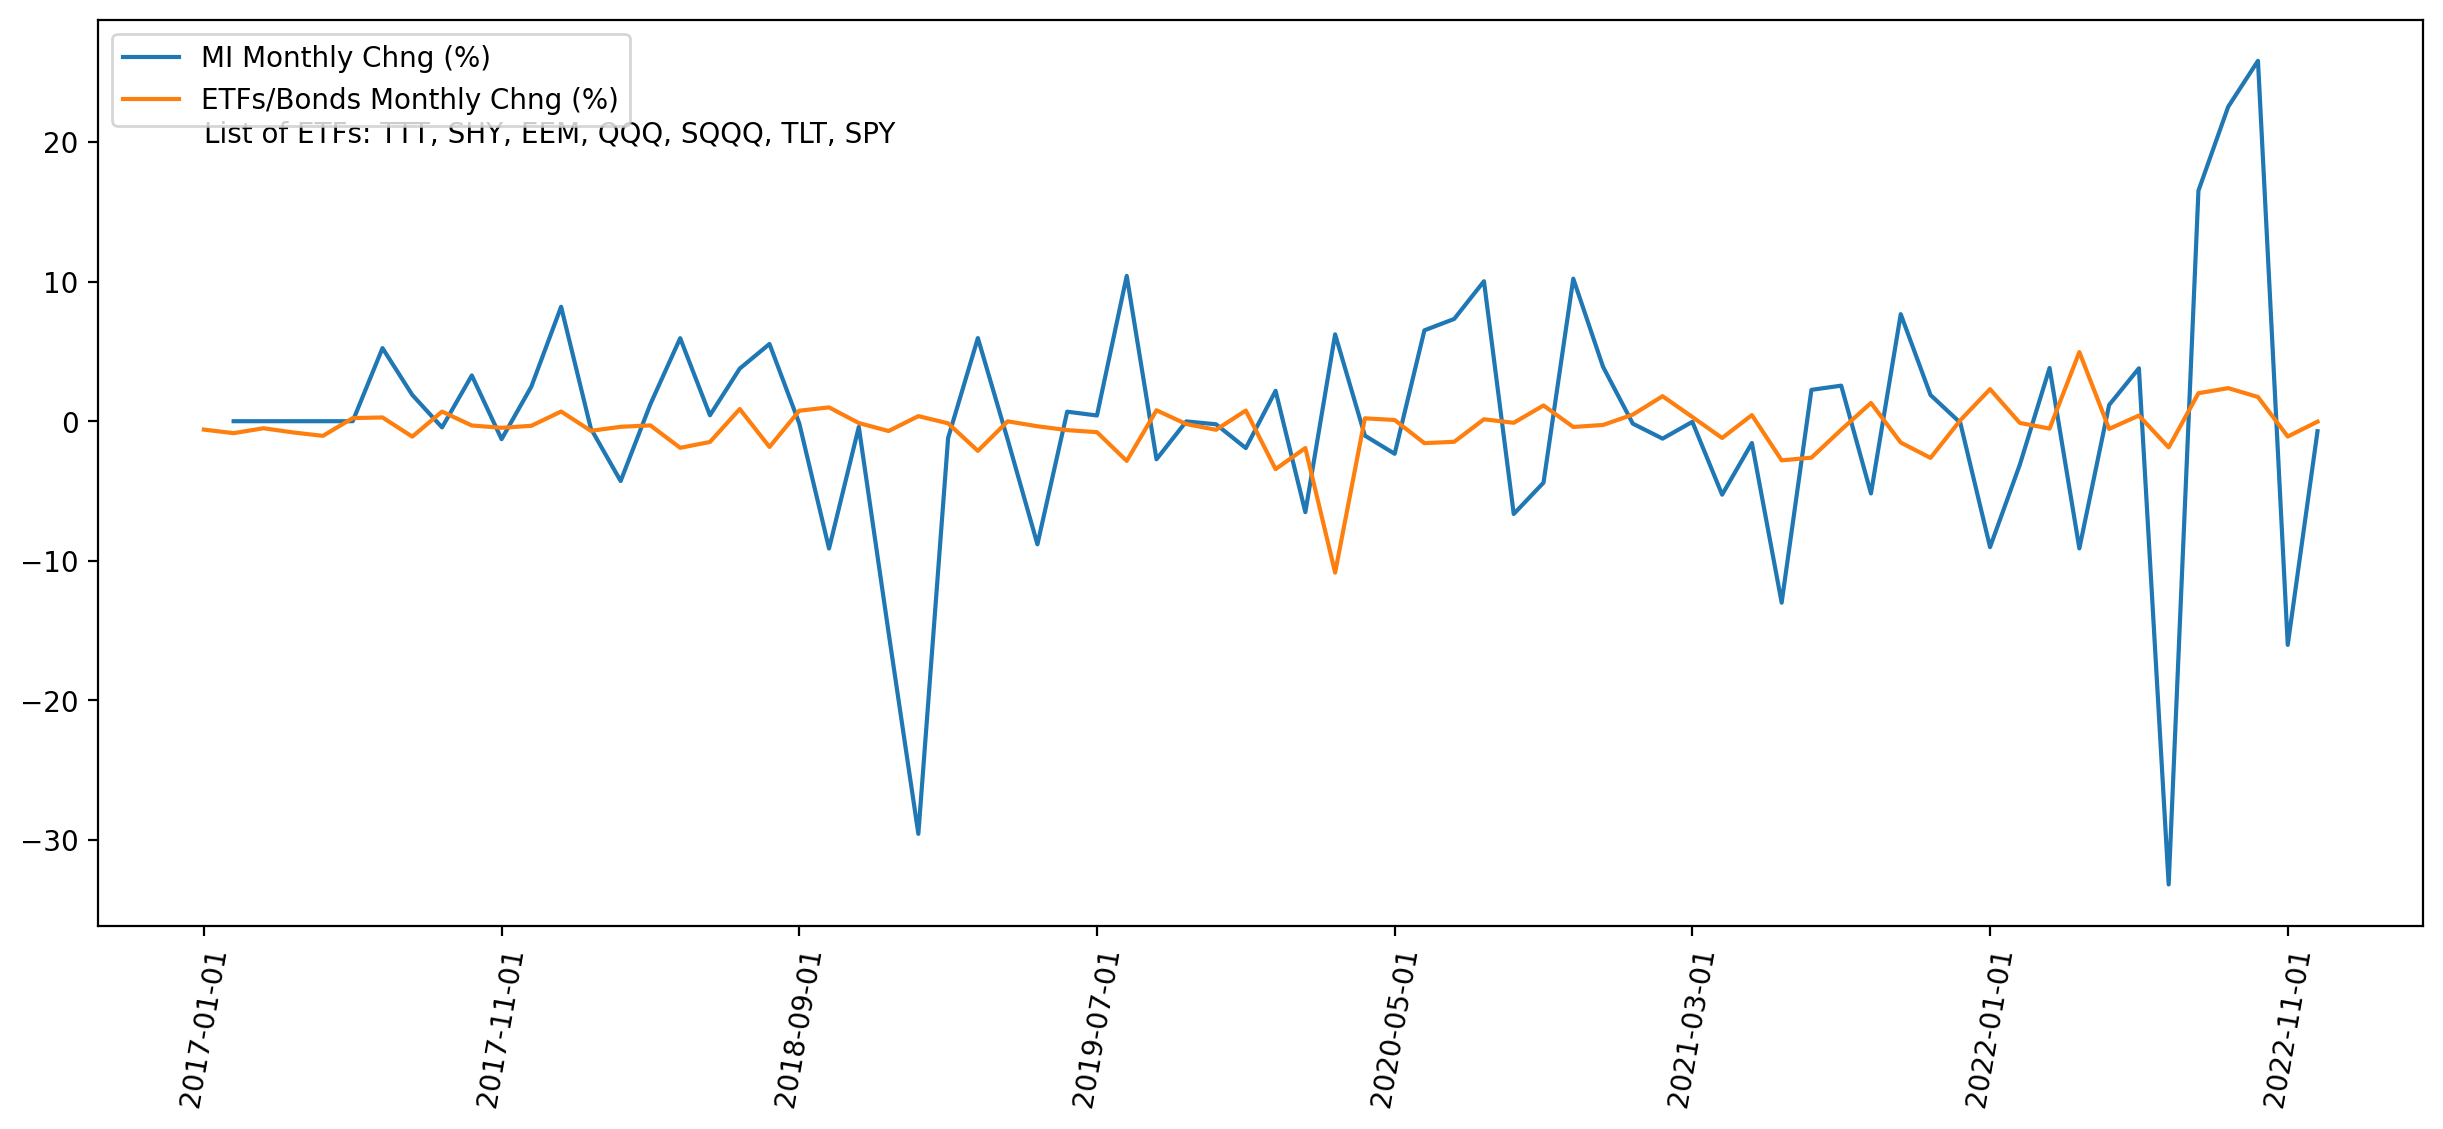

In [ ]:
plt.figure(figsize=(15,6), dpi=200)
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.plot(stocks_chosen.index, stocks_chosen['Growth (%)'], label='MI Monthly Chng (%)')
plt.plot(rolling_1.index, rolling_1['Monthly Chng (%)'], label='ETFs/Bonds Monthly Chng (%)')
plt.xticks(stocks_chosen.index[::10])
plt.legend(loc="upper left")
stocks_list = 'List of ETFs: ' + ', '.join(stocks + ['SPY'])
plt.text(0, 20, s=stocks_list)

In [ ]:
df = stocks_chosen['Growth (%)']/100 + 1

In [ ]:
df2 = rolling_1['Monthly Chng (%)']/100 + 1


In [ ]:
df = (df.cumprod()- 1)*100
df

Date
2017-01-01          NaN
2017-02-01          0.0
2017-03-01          0.0
2017-04-01          0.0
2017-05-01          0.0
                ...    
2022-08-01   -45.327294
2022-09-01   -33.007433
2022-10-01   -15.707972
2022-11-01   -29.219011
2022-11-25   -29.725212
Name: Growth (%), Length: 72, dtype: object

In [ ]:
# df2 = (df2.cumprod()- 1)*100
# df2

In [ ]:
# plt.figure(figsize=(15,6), dpi=200)
# plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
# plt.plot(df, label='MI Cumulative Growth (%)')
# plt.plot(df2, label = 'ETFs Cumulative Growth (%)')
# plt.ylabel('% Growth')
# plt.xlabel('Time Period')
# plt.xticks(stocks_chosen.index[::10])
# plt.legend(loc="upper left")
# stocks_list = 'List of ETFs: ' + ', '.join(stocks + ['SPY'])
# plt.text(27, 106, s=stocks_list)

In [ ]:
ticker = 'SPY'
query = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
data = pd.read_csv(query)
data = data.set_index('Date')
data=clean_yahoo(data,1)
data.columns = ['SPY']
spy = pd.DataFrame(data = data)

spy["SPY"]+=1
spy['Cum Growth (%)'] = (spy["SPY"].cumprod()-1)*100

In [ ]:
spy['Cum Growth (%)']

Date
2017-01-01     1.106473
2017-02-01     5.079101
2017-03-01     3.911019
2017-04-01     4.915756
2017-05-01     6.128964
                ...    
2022-08-01    53.672565
2022-09-01    39.705168
2022-10-01    49.428198
2022-11-01    54.097100
2022-11-25    54.288844
Name: Cum Growth (%), Length: 72, dtype: float64

In [ ]:
# spy.to_csv('spy.csv') 
# files.download('spy_data.csv')

Text(10, 276, 'List of ETFs: TTT, SHY, EEM, QQQ, SQQQ, TLT, SPY')

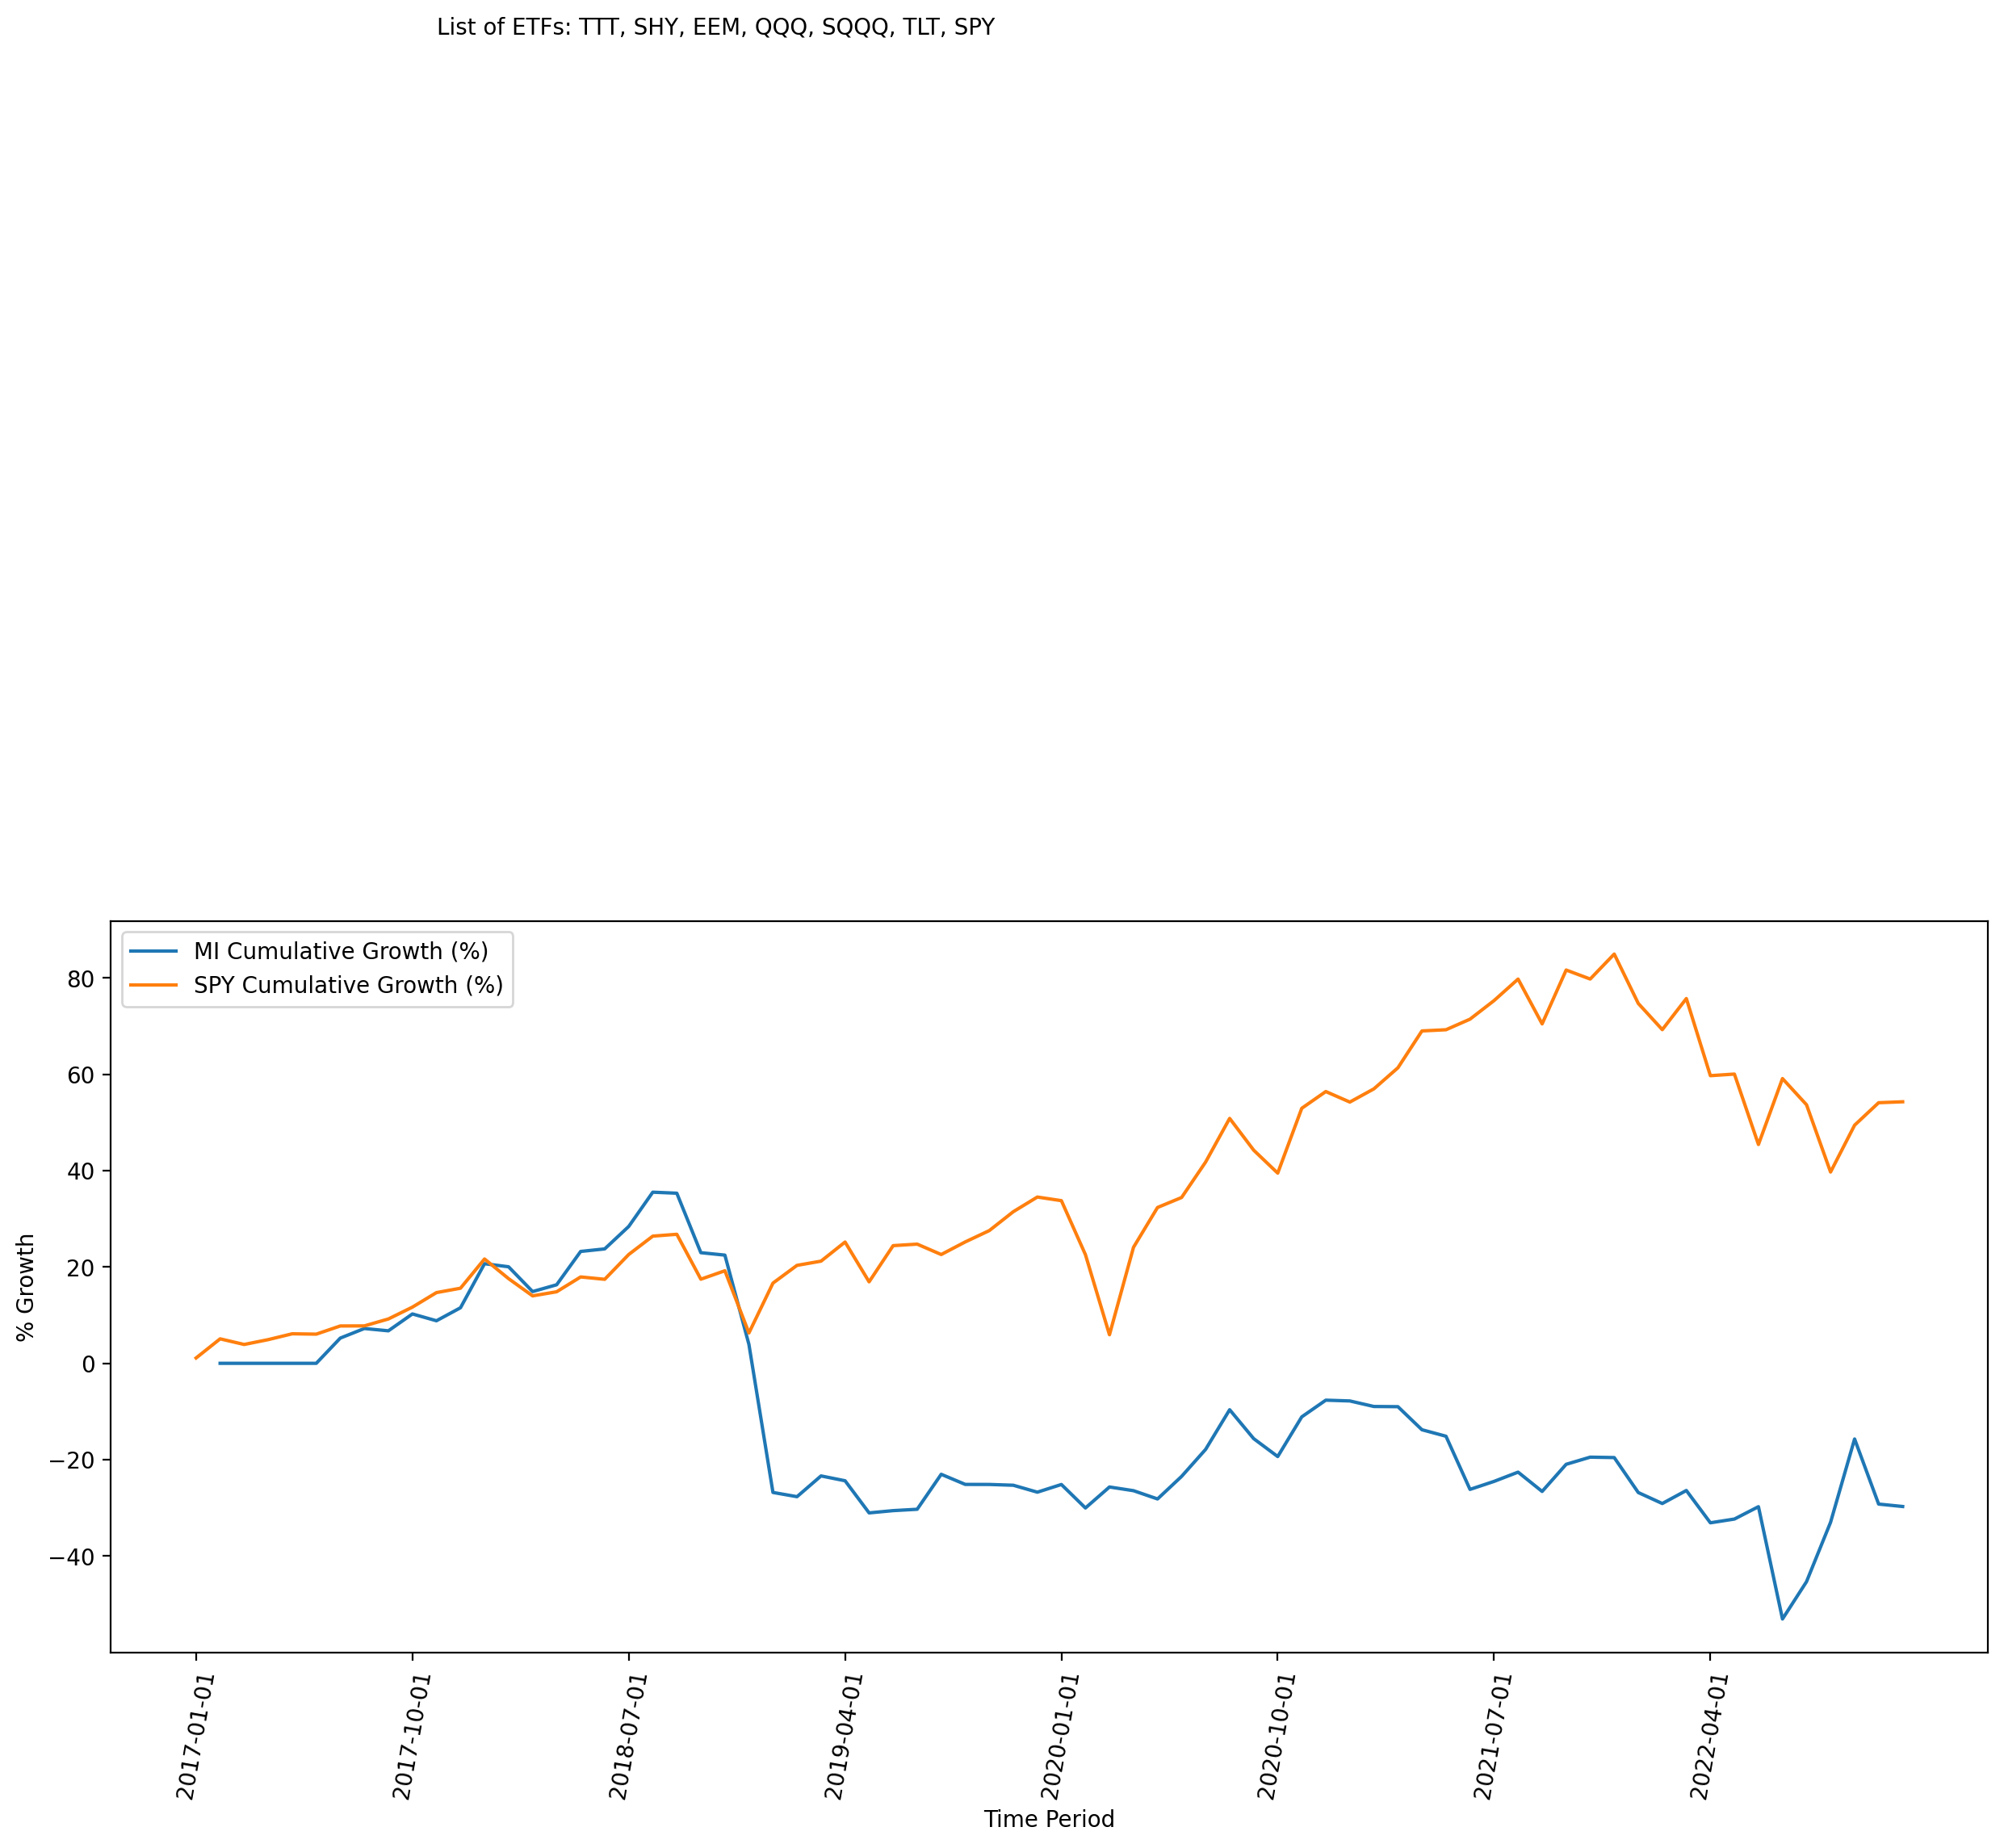

In [ ]:
plt.figure(figsize=(15,6), dpi=200)
plt.xticks(rotation = 80)
plt.plot(df, label='MI Cumulative Growth (%)')
plt.plot(spy['Cum Growth (%)'], label = 'SPY Cumulative Growth (%)')
plt.ylabel('% Growth')
plt.xlabel('Time Period')
plt.xticks(stocks_chosen.index[::9])
plt.legend(loc="upper left")
stocks_list = 'List of ETFs: ' + ', '.join(stocks + ['SPY'])
plt.text(10, 276, s=stocks_list)

In [ ]:
stocks

['TTT', 'SHY', 'EEM', 'QQQ', 'SQQQ', 'TLT']

In [ ]:

df

Date
2017-01-01          NaN
2017-02-01          0.0
2017-03-01          0.0
2017-04-01      1.39206
2017-05-01     4.996213
                ...    
2022-08-01     7.416444
2022-09-01    31.621496
2022-10-01    65.610057
2022-11-01    39.064677
2022-11-25    38.070134
Name: Growth (%), Length: 72, dtype: object

# **API Testing**

In [ ]:
alpha_spy = get_data()


KeyboardInterrupt: ignored

In [ ]:
alpha_spy

In [ ]:

def clean(data, duration):
  start = pd.Timestamp(year=2012, month=3, day=1)
  end = pd.Timestamp(year=2022, month=12, day=31)

  data = data.drop('2. high', axis=1)
  data = data.drop('3. low', axis=1)
  data = data.drop('5. adjusted close', axis=1)
  data = data.drop('6. volume', axis=1)
  data = data.drop('7. dividend amount', axis=1)
  data.columns = ['open', 'close']
  data = data.reset_index()
  data = data[data['date']>=start]
  data = data[data['date']<=end]

  data['monthly_pct_change'] = data.apply(lambda row: (row.close-row.open)/row.open, axis=1)

  data = data.set_index('date')
  data = data[::-1]

  past_4 = (data+1).rolling(duration).apply(np.prod)-1   # 3 month returns are calculated for each month which also includes that month
  # print(data)
  # print(past_4)
  return past_4




In [ ]:
x = clean(alpha_spy, 1)
x

In [ ]:
x['Cumulative Growth'] = (x['monthly_pct_change'] + 1).cumprod()

In [ ]:
x

,open,close,monthly_pct_change,Cumulative Growth
date,,,,
2012-03-30,137.31,140.81,0.025490,1.025490
2012-04-30,140.64,139.87,-0.005475,1.019875
2012-05-31,139.79,131.47,-0.059518,0.959174
2012-06-29,129.41,136.10,0.051696,1.008760
2012-07-31,136.48,137.71,0.009012,1.017851
...,...,...,...,...
2022-07-29,376.56,411.99,0.094089,2.525250
2022-08-31,409.15,395.18,-0.034144,2.439028
2022-09-30,392.89,357.18,-0.090891,2.217344


In [ ]:
# x.to_csv('alpha_spy_monthly_pct_chng.csv') 
# files.download('alpha_spy_monthly_pct_chng.csv')

In [ ]:
def clean_yahoo(data, duration):

  data = data.drop('High', axis=1)
  data = data.drop('Low', axis=1)
  data = data.drop('Adj Close', axis=1)
  data = data.drop('Volume', axis=1)
  data.columns = ['open', 'close']
  data = data.reset_index()

  data['pct_change'] = data.apply(lambda row: (row.close-row.open)/row.open, axis=1)

  # data = data.drop('open', axis=1)
  # data = data.drop('close', axis=1)
  data = data.set_index('Date')

  past_4 = (data+1).rolling(duration).apply(np.prod)-1 

  return past_4



In [ ]:
period1 = int(t.mktime(dt.datetime(2000, 1, 1, 23, 59).timetuple()))


In [ ]:
ticker = 'XLE'
query = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true"
data = pd.read_csv(query)
data = data.set_index('Date')
data=clean_yahoo(data,1)
spy = pd.DataFrame(data = data)

spy["pct_change"]+=1
spy['Cum Growth (%)'] = spy["pct_change"].cumprod()

In [ ]:
spy

,open,close,pct_change,Cum Growth (%)
Date,,,,
2000-01-01,27.312500,27.312500,1.000000,1.000000
2000-02-01,27.312500,26.156250,0.957666,0.957666
2000-03-01,26.015625,29.312500,1.126727,1.079028
2000-04-01,29.500000,28.875000,0.978814,1.056167
2000-05-01,29.187500,32.265625,1.105460,1.167551
...,...,...,...,...
2022-08-01,77.080002,80.500000,1.044369,2.210256
2022-09-01,79.309998,72.019997,0.908082,2.007094
2022-10-01,74.610001,90.000000,1.206273,2.421103


In [ ]:
100*(145.093750 - 148.250000)/148.250000

-2.1290050590219223

-0.02230890697676946